In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
data_df_1.createOrReplaceTempView("PATIENTS")
data_df_2.createOrReplaceTempView("GENE")

In [5]:
patientsSpark = spark.sql('SELECT * FROM PATIENTS AS A WHERE EXISTS(SELECT 1 FROM GENE AS B WHERE A.PATIENT_ID=B.PATIENT_ID)')
patientsSpark.show()

+--------------------+---+---+----------+---------------+---------+------------+---------+---------+-----------+---------+---------+
|          PATIENT_ID|SEX|AGE|TUMOR_TYPE|METASTASIS_TYPE|AJCC_CODE|VITAL_STATUS|ER_STATUS|PR_STSTUS|HER2_STATUS|NODE_TYPE|RPPA_CODE|
+--------------------+---+---+----------+---------------+---------+------------+---------+---------+-----------+---------+---------+
|TCGA-A2-A0CM     ...|  1| 40|         2|              0|        5|           0|        2|        2|          2|        0|        6|
|TCGA-A2-A0SW     ...|  1| 82|         2|              1|       11|           0|        1|        2|          2|        2|        6|
|TCGA-A2-A0D2     ...|  1| 45|         2|              0|        6|           1|        2|        2|          2|        0|        6|
|TCGA-AR-A1AS     ...|  1| 54|         2|              0|        4|           1|        1|        1|          2|        1|        1|
|TCGA-A2-A0EY     ...|  1| 62|         2|              0|        6|  

In [6]:
patientsPandas = patientsSpark.toPandas()
patientsPandas.head()

,PATIENT_ID,SEX,AGE,TUMOR_TYPE,METASTASIS_TYPE,AJCC_CODE,VITAL_STATUS,ER_STATUS,PR_STSTUS,HER2_STATUS,NODE_TYPE,RPPA_CODE
0,TCGA-A2-A0CM,1,40,2,0,5,0,2,2,2,0,6
1,TCGA-A2-A0SW,1,82,2,1,11,0,1,2,2,2,6
2,TCGA-A2-A0D2,1,45,2,0,6,1,2,2,2,0,6
3,TCGA-AR-A1AS,1,54,2,0,4,1,1,1,2,1,1
4,TCGA-A2-A0EY,1,62,2,0,6,1,1,2,1,1,3


In [7]:
patientsPandas.sort_values(by=['PATIENT_ID'],inplace=True)
patientsPandas.head()

,PATIENT_ID,SEX,AGE,TUMOR_TYPE,METASTASIS_TYPE,AJCC_CODE,VITAL_STATUS,ER_STATUS,PR_STSTUS,HER2_STATUS,NODE_TYPE,RPPA_CODE
0,TCGA-A2-A0CM,1,40,2,0,5,0,2,2,2,0,6
2,TCGA-A2-A0D2,1,45,2,0,6,1,2,2,2,0,6
17,TCGA-A2-A0EQ,1,64,2,0,5,1,2,2,1,0,6
68,TCGA-A2-A0EV,1,80,1,0,2,1,1,1,2,0,5
57,TCGA-A2-A0EX,1,46,3,0,6,1,1,1,2,0,5


In [8]:
patientsPandas.describe()

,SEX,AGE,TUMOR_TYPE,METASTASIS_TYPE,AJCC_CODE,VITAL_STATUS,ER_STATUS,PR_STSTUS,HER2_STATUS,NODE_TYPE,RPPA_CODE
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.974026,58.220779,2.077922,0.012987,5.506494,0.909091,1.246753,1.376623,1.701299,0.896104,3.532468
std,0.160101,13.282976,0.823443,0.113961,2.452836,0.289365,0.516971,0.562863,0.539613,1.130724,1.888918
min,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,48.000000,2.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
50%,1.000000,57.000000,2.000000,0.000000,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000
75%,1.000000,67.000000,2.000000,0.000000,6.000000,1.000000,2.000000,2.000000,2.000000,1.000000,5.000000
max,1.000000,88.000000,4.000000,1.000000,11.000000,1.000000,2.000000,2.000000,2.000000,4.000000,7.000000


In [9]:
patientsPandas.shape

(77, 12)

In [10]:
genePandas = data_df_2.toPandas()
genePandas.head()

,GENE,PATIENT_ID,VELUE
0,NP_113651-HSDL1 (inactive hydroxysteroid dehyd...,TCGA-BH-A18Q,-1.383680
1,NP_056410-SGEF (rho guanine nucleotide exchang...,TCGA-BH-A18Q,-1.835306
2,NP_612510-TECR (very-long-chain enoyl-CoA redu...,TCGA-BH-A18Q,0.901216
3,"NP_054797-MRPL13 (39S ribosomal protein L13, m...",TCGA-BH-A18Q,0.743983
4,"NP_002401-# (alpha-1,6-mannosylglycoprotein 6-...",TCGA-BH-A18Q,-0.697876


In [11]:
genePandasMatrix=genePandas.pivot(index='PATIENT_ID', columns='GENE')['VELUE']
genePandasMatrix.columns.name = None               #remove categories
genePandasMatrix = genePandasMatrix.reset_index()  
genePandasMatrix.sort_values(by=['PATIENT_ID'],inplace=True)
genePandasMatrix.head()

,PATIENT_ID,NP_000005-A2M (alpha-2-macroglobulin precursor),"NP_000007-ACADM (medium-chain specific acyl-CoA dehydrogenase, mitochondrial isoform a precursor)","NP_000008-ACADS (short-chain specific acyl-CoA dehydrogenase, mitochondrial precursor)","NP_000009-ACADVL (very long-chain specific acyl-CoA dehydrogenase, mitochondrial isoform 1 precursor)","NP_000010-ACAT1 (acetyl-CoA acetyltransferase, mitochondrial precursor)",NP_000012-PSEN1 (presenilin-1 isoform I-467),NP_000013-ADA (adenosine deaminase),NP_000017-ADSL (adenylosuccinate lyase isoform a),NP_000018-AGA (N(4)-(beta-N-acetylglucosaminyl)-L-asparaginase isoform 1 preproprotein),...,XP_370934-# (PREDICTED: uncharacterized protein LOC388210),XP_373042-# (PREDICTED: uncharacterized protein LOC391722),XP_373277-# (PREDICTED: uncharacterized protein LOC392288),YP_003024026-ND1 (NADH dehydrogenase subunit 1),YP_003024028-COX1 (cytochrome c oxidase subunit I),YP_003024029-COX2 (cytochrome c oxidase subunit II),YP_003024030-# (ATP synthase F0 subunit 8),YP_003024031-# (ATP synthase F0 subunit 6),YP_003024032-# (cytochrome c oxidase subunit III),YP_003024036-ND5 (NADH dehydrogenase subunit 5)
0,TCGA-A2-A0CM,-0.521510,-0.863147,-2.824805,-0.481101,-1.021108,-1.671321,1.374025,1.036061,-1.752138,...,0.0,0.084620,1.058102,-0.290079,-7.541601,0.161764,-0.819065,0.393196,-0.150485,0.000000
1,TCGA-A2-A0D2,-0.161949,-0.304984,-1.489188,-0.803947,-0.764030,-2.254263,0.180672,0.905830,-1.272971,...,0.0,1.291694,3.390662,-0.344901,-0.860496,-0.710807,-1.076713,-1.206443,0.000000,-1.565695
2,TCGA-A2-A0EQ,-0.154906,-0.078364,-1.264763,2.382458,-2.252153,0.000000,1.284082,0.576069,0.817176,...,0.0,-2.221537,-1.463772,2.864672,2.470481,2.187276,-0.430456,2.378631,0.000000,0.000000
3,TCGA-A2-A0EV,1.497610,0.769454,3.208777,1.494809,1.113928,-4.064383,2.077334,-0.017515,-3.333426,...,0.0,1.007505,-0.409599,-0.443206,-2.157174,-0.773677,-0.009113,-1.454223,-5.534699,0.000000
4,TCGA-A2-A0EX,-0.304380,0.671103,-1.932688,-0.765859,-0.788371,0.040791,0.288414,0.175858,0.487262,...,0.0,0.986260,1.207619,-0.574514,-3.080757,-2.214078,-1.024738,-3.249591,0.000000,-0.330644


In [12]:
genePandasMatrix.describe()

,NP_000005-A2M (alpha-2-macroglobulin precursor),"NP_000007-ACADM (medium-chain specific acyl-CoA dehydrogenase, mitochondrial isoform a precursor)","NP_000008-ACADS (short-chain specific acyl-CoA dehydrogenase, mitochondrial precursor)","NP_000009-ACADVL (very long-chain specific acyl-CoA dehydrogenase, mitochondrial isoform 1 precursor)","NP_000010-ACAT1 (acetyl-CoA acetyltransferase, mitochondrial precursor)",NP_000012-PSEN1 (presenilin-1 isoform I-467),NP_000013-ADA (adenosine deaminase),NP_000017-ADSL (adenylosuccinate lyase isoform a),NP_000018-AGA (N(4)-(beta-N-acetylglucosaminyl)-L-asparaginase isoform 1 preproprotein),NP_000019-AGL (glycogen debranching enzyme isoform 1),...,XP_370934-# (PREDICTED: uncharacterized protein LOC388210),XP_373042-# (PREDICTED: uncharacterized protein LOC391722),XP_373277-# (PREDICTED: uncharacterized protein LOC392288),YP_003024026-ND1 (NADH dehydrogenase subunit 1),YP_003024028-COX1 (cytochrome c oxidase subunit I),YP_003024029-COX2 (cytochrome c oxidase subunit II),YP_003024030-# (ATP synthase F0 subunit 8),YP_003024031-# (ATP synthase F0 subunit 6),YP_003024032-# (cytochrome c oxidase subunit III),YP_003024036-ND5 (NADH dehydrogenase subunit 5)
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.287555,-0.039780,0.169086,0.317449,0.252189,-0.570235,0.483389,-0.093926,0.070837,-0.653213,...,-0.352670,0.024624,0.377324,0.185109,-0.836208,-0.379795,-0.040222,-0.799457,-0.641565,-0.210038
std,2.312866,1.190107,2.047652,1.131417,1.320941,1.699095,1.351152,0.973437,1.488335,1.946804,...,1.549121,1.036222,1.412193,1.736682,2.818743,1.856647,1.169051,1.964106,2.059478,1.020343
min,-4.785660,-3.357123,-3.992819,-2.201173,-2.252153,-5.008347,-2.767168,-2.494719,-3.333426,-5.860086,...,-6.378095,-2.800336,-2.796876,-3.414842,-11.771009,-5.674594,-3.766370,-5.126351,-7.747404,-3.307376
25%,-1.192737,-0.863147,-1.134562,-0.556235,-0.736185,-1.671321,-0.360834,-0.613096,-0.804388,-2.088104,...,0.000000,-0.674217,-0.434717,-0.887978,-2.456647,-1.284582,-0.507697,-1.816552,-0.150485,-0.646148
50%,-0.124276,0.063779,0.201426,0.443667,0.112056,-0.002490,0.313686,0.130738,0.071838,-0.869859,...,0.000000,-0.048157,0.000137,0.000000,-0.355537,-0.512087,-0.009113,-0.761011,0.000000,0.000000
75%,1.499922,0.595706,1.023385,1.013351,0.982339,0.216987,1.450622,0.487815,0.817176,0.394324,...,0.000000,0.753365,1.275167,1.287421,0.777595,1.099708,0.523412,0.031191,0.000000,0.000000
max,5.780506,2.827752,5.125731,2.605107,3.892844,3.537608,3.653616,2.998089,4.183748,6.279591,...,3.959300,2.168844,3.916595,4.405202,4.343558,3.525990,2.572381,4.273863,5.420164,2.977406


In [13]:
genePandasMatrix.shape

(77, 12554)

In [14]:
patientsPandas.drop(columns=['PATIENT_ID'], inplace=True)
genePandasMatrix.drop(columns=['PATIENT_ID'], inplace=True)

In [15]:
patientsPandas.shape

(77, 11)

In [16]:
genePandasMatrix.shape

(77, 12553)

In [17]:
patientNumpy = patientsPandas.values

In [18]:
geneNumpy =genePandasMatrix.values

In [22]:
patientNumpy.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [40, 45, 64, 80, 46, 62, 82, 48, 37, 50, 59, 63, 67, 63, 67, 57,
        57, 44, 66, 84, 66, 69, 76, 79, 36, 79, 41, 56, 88, 62, 69, 61,
        61, 64, 53, 54, 59, 40, 39, 51, 36, 68, 53, 66, 64, 54, 80, 54,
        68, 65, 52, 78, 61, 48, 58, 30, 52, 53, 88, 56, 72, 67, 43, 46,
        55, 45, 52, 52, 64, 54, 74, 68, 43, 45, 45, 45, 45],
       [ 2,  2,  2,  1,  3,  2,  2,  1,  1,  3,  2,  3,  1,  2,  2,  2,
         2,  3,  4,  3,  2,  4,  4,  3,  2,  3,  4,  2,  4,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  1,  2,  1,  2,
         2,  2,  1,  2,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2

In [23]:
corrMatrix=np.dot(patientNumpy.T,geneNumpy)

In [24]:
corrMatrix.shape

(11, 12553)

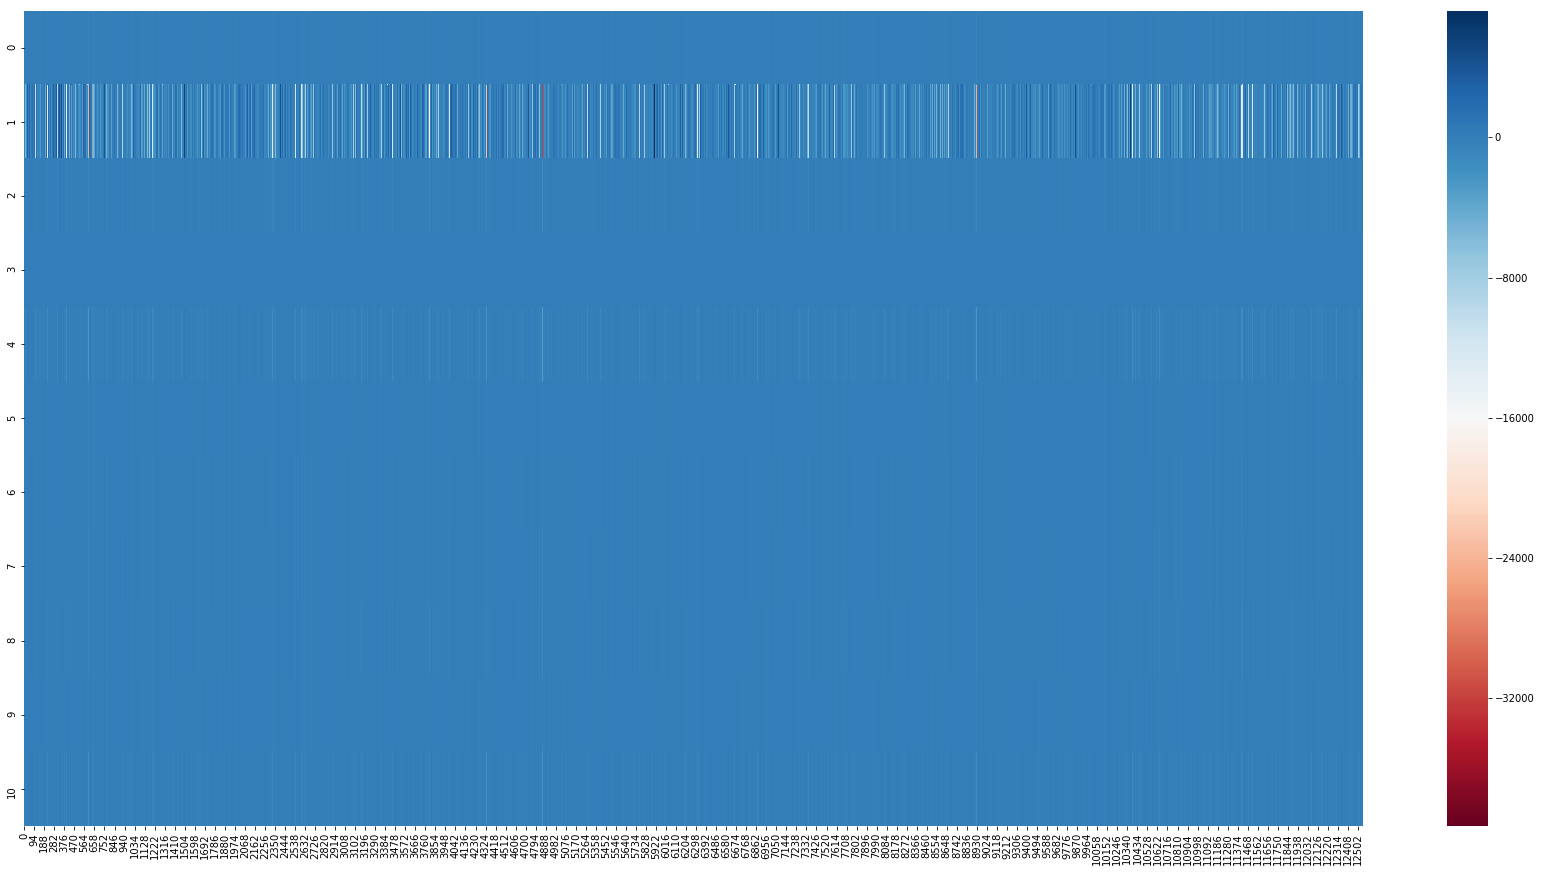

In [25]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.heatmap(corrMatrix, cmap="RdBu", ax=ax)